# CHAPTER 10 - SIMPLE LINEAR REGRESSION

## By Melinda Anderson

## What does Simple Linear Regression Model do?
#### A linear regression model is a conceptual model that is used to predict the value of a dependent variable based on the values of one or more independent variables.

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [5]:
data = sns.load_dataset('diamonds')

In [6]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Pearson Correlation Coefficient (r-value) 
* r-value measures the type and strength of the linear correlation between two variables
* r-value is a number between 1.0 and -1.0
* r-value is close to 1.0 it indicates a strong positive correlation
* r-value is close to -1.0 it indicates a strong negative correlation 
* r-value is 0.00 it indicates there is no correlation

In [8]:
data = data.drop(columns=['cut','color','clarity'])
data.corr().head(7)

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


<Axes: >

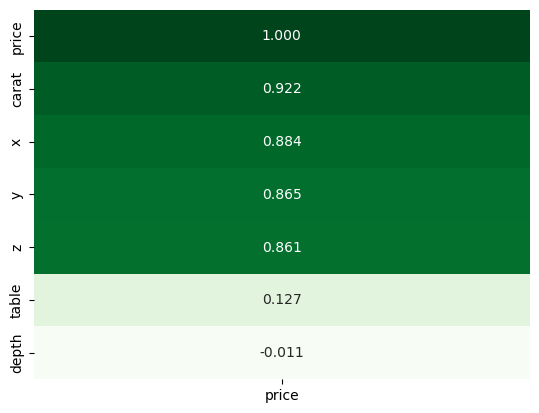

In [9]:
sns.heatmap(data=data.corr()[['price']].sort_values(by='price', ascending=False), annot=True, cmap='Greens', cbar=False, fmt=f'.3f')

## Procedure for Creating and Using a Regression Model
1. Split dataset.
2. Create model from training dataset.
3. Validate model with test dataset.
4. If model is valid, predict data with it.

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(
    data[['carat']], data[['price']],
    test_size=0.30, random_state=20)

In [13]:
model = LinearRegression()
print(model)

LinearRegression()


In [14]:
model.fit(x_train, y_train)

LinearRegression()

In [15]:
model.score(x_test, y_test)

0.8504107786474794

In [16]:
y_data = model.predict(x_test)
y_data

array([[9540.64191438],
       [1940.07543252],
       [3180.98424589],
       ...,
       [9618.19871522],
       [-464.18539337],
       [5507.68827094]])

In [17]:
predicted = pd.DataFrame(y_data, columns=['Predicted_Price'])
predicted.head(3)

,Predicted_Price
0,9540.641914
1,1940.075433
2,3180.984246


In [18]:
joined = predicted.join([x_test.reset_index(drop=True),
                         y_test.reset_index(drop=True)])

joined.head()

,Predicted_Price,carat,price
0,9540.641914,1.52,8674
1,1940.075433,0.54,1637
2,3180.984246,0.70,2657
3,2327.859437,0.59,1838
4,4421.893059,0.86,2980


In [19]:
joined = predicted.join([x_test.reset_index(drop=True),
                         y_test.reset_index(drop=True)])
melted = pd.melt(joined, id_vars=['carat'],
                 value_vars=['price', 'Predicted_Price'],
                 var_name='price', value_name='predicted_price')
melted

,carat,price,predicted_price
0,1.52,price,8674.000000
1,0.54,price,1637.000000
2,0.70,price,2657.000000
3,0.59,price,1838.000000
4,0.86,price,2980.000000
...,...,...,...
32359,0.31,Predicted_Price,156.269013
32360,1.01,Predicted_Price,5585.245072
32361,1.53,Predicted_Price,9618.198715
32362,0.23,Predicted_Price,-464.185393


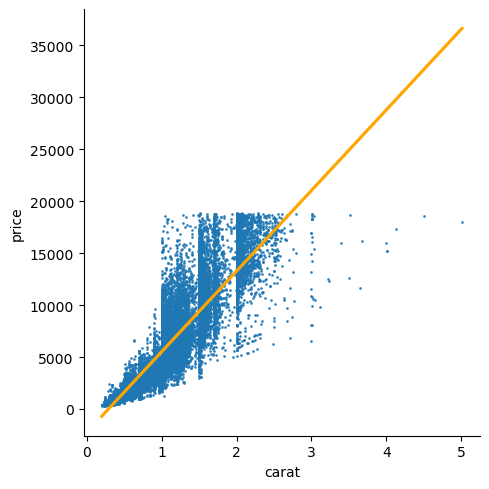

In [20]:
# I couldn't figure out how to put the line plot here or add the legend
sns.lmplot(data=data, x='carat', y='price', ci=None,
           scatter_kws={'s':1}, line_kws={'color':'orange'})

 ## Regression line equation is **y = mx + b**, where...
 * y is the **dependent** variable
 * m is the **slope** of the line
 * x is the **independent** variable
 * b is the **Y-intercept**

In [22]:
X = data.carat.values.reshape(-1,1)
y = data.price

In [23]:
lr = LinearRegression()
predicted = lr.fit(X,y)

In [24]:
m = predicted.coef_
b = predicted.intercept_
print(f'Slope: {m}, y-intercept: {b}')

Slope: [7756.42561797], y-intercept: -2256.360580045423


In [25]:
print(f'Regression line equation is y = {m}x + {b}')

Regression line equation is y = [7756.42561797]x + -2256.360580045423


In [26]:
predicted_price = 0 
predicted_price = m * .70 + b
print(f'The predicted price for a 0.54 carat diamond is $({predicted_price})') #Couldn't figure out how to round the numbers. I tried round and :.2f

The predicted price for a 0.54 carat diamond is $([3173.13735253])


In [27]:
predicted_price = 0 
predicted_price = m * .54 + b
print(f'The predicted price for a 0.54 carat diamond is ${predicted_price}')

The predicted price for a 0.54 carat diamond is $[1932.10925366]


## The estimates aren't close to the predicted prices.
